<h1 style="text-align:center">Model Development</h1>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(path)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### 1. Linear Regression Model :

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
lr = LinearRegression()

In [136]:
x = df[["highway-mpg"]]
y = df[["price"]]

In [137]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
yhat = lr.predict(x)
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [139]:
intercept = lr.intercept_
coef = lr.coef_
print("Intercept : ",intercept,"Coefficient : ",coef)

Intercept :  [38423.30585816] Coefficient :  [[-821.73337832]]


In [140]:
price = intercept + coef * 27
price

array([[16236.50464347]])

Final estimate linear model :
#### price = 38423.30585816 + (-821.73337832) * highway-mpg

### 2. Multiple Linear Regression Model :

In [141]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [142]:
lr.fit(z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [143]:
intercept = lr.intercept_
coef = lr.coef_
print("Intercept : ",intercept," Coefficient : ",coef)

Intercept :  [-15806.62462633]  Coefficient :  [[53.49574423  4.70770099 81.53026382 36.05748882]]


Final estimate MLR model :
#### price  = -15806.62462633 + 53.49574423 * horsepower + 4.70770099 * curb-weight + 81.53026382 * engine-size + 36.05748882 * highway-mpg

### 3. Polynomial Regression Model :

In [144]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [157]:
w = df['highway-mpg']
v = df['price']

In [158]:
f = np.polyfit(w, v, 1)
p = np.poly1d(f)
print(p)

 
-821.7 x + 3.842e+04


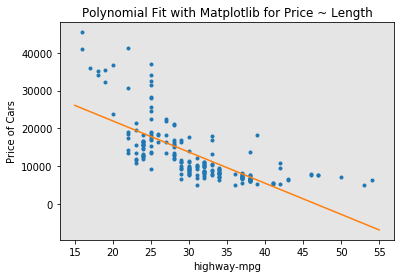

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [159]:
PlotPolly(p, w, v, 'highway-mpg')
np.polyfit(w, v, 3)

#### Polynomial on multiple features

In [160]:
from sklearn.preprocessing import PolynomialFeatures

In [161]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [162]:
Z_pr=pr.fit_transform(z)

In [163]:
z.shape

(201, 4)

In [164]:
Z_pr.shape

(201, 15)

### 4. Pipeline

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [166]:
input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [167]:
pipe = Pipeline(input)

In [168]:
pipe.fit(z,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [169]:
ypipe = pipe.predict(z)
ypipe[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([[13102.74784201],
       [13102.74784201],
       [18225.54572197],
       [10390.29636555],
       [16136.29619164]])

### 5. Measure for In-Sample Evaluation

#### - Model 1 : Linear Regression 

In [177]:
# R-squared
lr.fit(x,y)
r_sq = lr.score(x,y)
print("R-squared : ",r_sq)

R-squared :  0.4965911884339175


In [181]:
#MSE
yhat = lr.predict(x)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'],yhat)
print("Mean Squared Error : ",mse)

Mean Squared Error :  31635042.944639895
